In [1]:
#install tensorflow
#load the dataset
#plot the data
#find the labels
#augment the data
#use the cifar architecture sample from udacity
#try resnet & compare performance measures
#research the best architecture & compare performance measures
#implement the architecture

In [52]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [25]:
data = np.load('fashion_mnist_dataset_train.npy', allow_pickle=True).item()

In [26]:
data

{'features': array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0

In [27]:
data['features'][0][6]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.60784314,
       0.9254902 , 0.81176471, 0.69803922, 0.41960784, 0.61176471,
       0.63137255, 0.42745098, 0.25098039, 0.09019608, 0.30196078,
       0.50980392, 0.28235294, 0.05882353])

In [28]:
data['features'].shape

(60000, 28, 28)

In [29]:
data['features'][0][6].shape

(28,)

In [30]:
data['target']

array([5., 2., 1., ..., 3., 1., 4.])

In [31]:
data['target'].shape

(60000,)

In [102]:
s = pd.Series(data['target'])
target = s.replace([1, 2, 3, 4, 5], [0, 1, 2, 3, 4])
target = target.to_numpy()
target

array([4., 1., 0., ..., 2., 0., 3.])

In [103]:
target.shape

(60000,)

In [104]:
from sklearn.model_selection import train_test_split
# Splitting the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(data['features'], target, test_size=0.2, random_state=275)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=275)

In [105]:
X_train.shape

(48000, 28, 28)

In [106]:
X_val.shape

(6000, 28, 28)

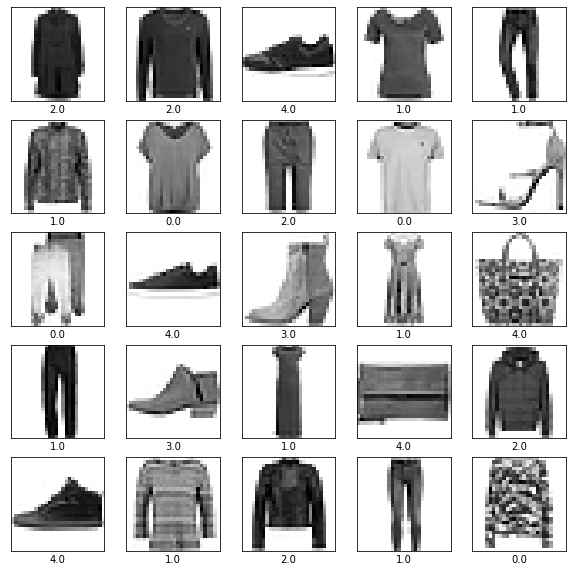

In [107]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [108]:
#plot the label distribution
import pandas as pd
df_label = pd.DataFrame(data['target'])

In [109]:
df_label

,0
0,5.0
1,2.0
2,1.0
3,2.0
4,1.0
...,...
59995,4.0
59996,2.0
59997,3.0
59998,1.0


In [110]:
df_label.value_counts()

2.0    12019
3.0    12011
4.0    11992
1.0    11989
5.0    11989
dtype: int64

Data is almost evenly distributed among the labels

In [112]:
# Deep Learning Libraries
from tensorflow.keras import datasets, layers, models

In [113]:
#output softmax layer should have 5 outputs
# Building a ConvNet
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [114]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_14 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 3, 3, 64)         

In [115]:
X_train = X_train.reshape((-1, 28, 28, 1))
X_val = X_val.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

In [116]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_val, y_val))

Train on 48000 samples, validate on 6000 samples
Epoch 1/10
48000/48000 [==============================] - 114s 2ms/sample - loss: 1.1461 - accuracy: 0.7570 - val_loss: 1.1455 - val_accuracy: 0.7575
Epoch 2/10
48000/48000 [==============================] - 113s 2ms/sample - loss: 1.0998 - accuracy: 0.8033 - val_loss: 1.0861 - val_accuracy: 0.8170
Epoch 3/10
48000/48000 [==============================] - 113s 2ms/sample - loss: 1.0862 - accuracy: 0.8167 - val_loss: 1.1131 - val_accuracy: 0.7905
Epoch 4/10
48000/48000 [==============================] - 113s 2ms/sample - loss: 1.0788 - accuracy: 0.8238 - val_loss: 1.0608 - val_accuracy: 0.8430
Epoch 5/10
48000/48000 [==============================] - 113s 2ms/sample - loss: 1.0717 - accuracy: 0.8313 - val_loss: 1.0600 - val_accuracy: 0.8428
Epoch 6/10
48000/48000 [==============================] - 113s 2ms/sample - loss: 1.0697 - accuracy: 0.8339 - val_loss: 1.0568 - val_accuracy: 0.8475
Epoch 7/10
48000/48000 [===========================

In [117]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

6000/1 - 6s - loss: 1.0203 - accuracy: 0.8328
0.83283335


In [31]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images

In [118]:
datagen.fit(X_train)

In [ ]:
#understand shapes from tutorials
#finish augmentation
#plot augmentation
#construct model with layers
#fit without augmentation
#train
#fit with augmentation
#compare accuracies